# An enhanced particle swarm optimization with position update for optimal        feature selection
## Sani Tijjani,  Mohd Nadhir Ab Wahab and  Mohd Halim Mohd Noor,

### School of Computer Sciences, Universiti Sains Malaysia, 11800 USM Pulau Pinang.

In [62]:
import matplotlib.pyplot as plt
import pandas
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')
import numpy as np

### Data preparation

In [63]:
Data=pandas.read_csv('C:/Users/Engr. Dr Sani Tijjan/Desktop/Experiment E/Experiments/UCIcsv/BreastEW.csv',header=None)#header=None
header=None 
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,...,30.25,102.50,787.9,0.1094,0.2043,0.20850,0.11120,0.2994,0.07146,1
1,10.49,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842,2
2,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,0.1619,0.06408,...,26.51,76.43,407.5,0.1428,0.2510,0.21230,0.09861,0.2289,0.08278,2
3,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,...,41.85,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860,1
4,16.46,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,0.1794,0.06323,...,28.45,123.50,981.2,0.1415,0.4667,0.58620,0.20350,0.3054,0.09519,1


In [64]:
data = pd.DataFrame(data=Data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,...,30.25,102.50,787.9,0.1094,0.2043,0.20850,0.11120,0.2994,0.07146,1
1,10.49,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842,2
2,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,0.1619,0.06408,...,26.51,76.43,407.5,0.1428,0.2510,0.21230,0.09861,0.2289,0.08278,2
3,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,...,41.85,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860,1
4,16.46,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,0.1794,0.06323,...,28.45,123.50,981.2,0.1415,0.4667,0.58620,0.20350,0.3054,0.09519,1


In [65]:
data.rename(columns={ data.columns[30]: "Class" }, inplace = True)

In [66]:
data['Class'].value_counts()

2    357
1    211
Name: Class, dtype: int64

### Label encoding

In [67]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['label']=label.fit_transform(data['Class'])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,Class,label
0,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,...,102.50,787.9,0.1094,0.2043,0.20850,0.11120,0.2994,0.07146,1,0
1,10.49,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842,2,1
2,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,0.1619,0.06408,...,76.43,407.5,0.1428,0.2510,0.21230,0.09861,0.2289,0.08278,2,1
3,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,...,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860,1,0
4,16.46,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,0.1794,0.06323,...,123.50,981.2,0.1415,0.4667,0.58620,0.20350,0.3054,0.09519,1,0


In [68]:
data['label'].value_counts()

1    357
0    211
Name: label, dtype: int64

### Data Scaling

In [69]:
X = data.drop(['Class','label'], axis=1).copy()
#X = data.drop(['Code','Class','label'], axis=1).copy()
y = data.label

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [71]:
data.shape

(568, 32)

### Dimensionslity reduction mechanism

In [72]:
Fs = data.shape[0]
n =12
from sklearn.decomposition import PCA
pca = PCA(n_components = n)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
#X=X_pca

original shape:    (568, 30)
transformed shape: (568, 12)


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Ft = X
Fr = X_pca


#Ft_accuracy
X=Ft
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
model_Ft = KNeighborsClassifier(leaf_size=1, n_neighbors=1, algorithm='auto', p=1)#n_neighbor
model_Ft.fit(X_train, y_train)
predictions1 = model_Ft.predict(X_test)
score_Ft = accuracy_score(y_test, predictions1)
print('Ft_Accuracy: %.3f' % (score_Ft*100))
print("original shape:   ", X.shape)


#Fr_accuracy
X=Fr
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
model_Fr = KNeighborsClassifier(leaf_size=1, n_neighbors=1, algorithm='auto', p=1)#n_neighbor
model_Fr.fit(X_train, y_train)
predictions2 = model_Fr.predict(X_test)
score_Fr = accuracy_score(y_test, predictions2)
print('Fr_Accuracy: %.3f' % (score_Fr*100))
print("transformed shape:", X_pca.shape)



Ft_Accuracy: 95.614
original shape:    (568, 30)
Fr_Accuracy: 94.737
transformed shape: (568, 12)


In [74]:
X = Fr
nf = (Fr.shape[1])
nf2 = (Ft.shape[1])

### Data spltiting

In [75]:
from numpy import concatenate
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from time import time

# split into train and test (80% : 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

# Check dimensions of data after splitting

print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}\n")

print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}\n")

#print(f"X_val dimensions: {X_val.shape}")
#print(f"y_val dimensions: {y_val.shape}\n")

X_train dimensions: (454, 12)
y_train dimensions: (454,)

X_test dimensions: (114, 12)
y_test dimensions: (114,)



### KNN Hyperparameter tuning

In [76]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,50))
n_neighbors =list(range(1,30))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size,n_neighbors=n_neighbors, p=p)

knn = KNeighborsClassifier()
clf = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=10)
best_model = clf.fit(X_train, y_train)

In [77]:
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', best_model.best_estimator_.get_params()['p'])

Best leaf_size: 1
Best n_neighbors: 11
Best p: 1


In [78]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(leaf_size=1, n_neighbors=1, algorithm='auto', p=1)#n_neighbor

start = time()
model1.fit(X_train, y_train)
end = time()

# make predictions on hold out test set
predictions1 = model1.predict(X_test)

score1 = accuracy_score(y_test, predictions1)
print('Accuracy of hyperparametertuned KNN: %.3f' % (score1*100))


Accuracy of hyperparametertuned KNN: 94.737


### Enhanced BPSO

In [107]:
import random
from random import random
from random import random,randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import seaborn as sns # data visualization library 

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [109]:
start = time()
class BPSO:
    def __init__(self, f_count, df):
        
        #feature count 
        self.f_count  = f_count
        # Actual Positions  radmon prob
        self.pos_act  = []
        # Position prob > 0.5 set as 1 or 0  
        self.position = []
        # Velocity random between -1 and 1 
        self.velocity = []
        # best position 
        self.pos_best = []
        # Y actual 
        self.y_actual = []
        # Y test predicted 
        self.y_predict= []
        # best fit accuracy, Recall, Precision
        self.fit_best = (-1, -1, -1)
        # accuracy , recall, precsion 
        self.fitness  = (-1, -1, -1)
        # data 
        self.df       = df.copy()
        
        self.initialize(f_count)
        #M=0.7
    
    # initialize 
    def initialize(self, f_count):
        self.f_count = f_count
        self.initalize_position(f_count)
        self.initialize_velocity(f_count)
    
    def set_data(self,data):
        self.df = data.copy()
        print(self.df.head())
        
    #Initialize the positions > 0.5  is set as 1
    def initalize_position(self,f_count):
        self.pos_act = np.random.uniform(low=0, high=1, size=f_count).tolist()
        self.position = [1 if po > 0.5 else 0  for po in self.pos_act]
        
    def initialize_velocity(self, f_count):
        self.velocity = np.random.uniform(low=-1, high=1, size=f_count).tolist()
        
    
    def drop_columns(self, X):
        print(X.shape)
        print(self.position)
        for index, value in enumerate(self.position):
            if value == 0 :
                X_1 = X.drop(X.columns[index], axis = 1)
        return X_1
    
    def classification_accuracy(self,y_actual, y_hat):
        
        cnf_matrix = confusion_matrix(y_actual, y_hat)
        
        FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
        FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
        TP = np.diag(cnf_matrix)
        TN = cnf_matrix.sum() - (FP + FN + TP)
        
        #class_acc = (TP+TN) / (TP+FP+TN+FN)
        class_acc = sum(TP)/(TP+FP+TN+FN)
        precision = (TP) / ( TP + FP )  
        sensitivity =  (TP)/ (TP+FN)
        specificity =(sum(TP)-TP)/((sum(TP)-TP)+FP)
        
        return (class_acc,precision,sensitivity,specificity)
        
    
    def process_data(self):
        
        # Spilt the train and test data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        # we used 30% test data
        # check the size before beginning
        X_train.shape, X_test.shape, y_train.shape, y_test.shape
    
        model1 = KNeighborsClassifier(leaf_size=1, n_neighbors=1, algorithm='auto', p=1)
        #start = time()
        model1.fit(X_train, y_train)
        #end = time()
        y_pred = model1.predict(X_test)
        
        # find accuracy
        ac = accuracy_score(y_test, y_pred)
        
        class_acc = self.classification_accuracy(y_test, y_pred)
        
        self.y_actual = y_test
        self.y_predict = y_pred
         
        return class_acc
    
    
    def fitness_check(self,fitness, fit_best):
        is_fitness = False
        
        if (fitness[0][:, None] > fit_best[0]).any() or (fit_best[0] == -1).any():
            if (fitness[1][:, None] >= fit_best[1]).any() and (fitness[2][:, None] >= fit_best[2]).any():
                is_fitness = True
        
        return is_fitness

    #evaluate the fitness
    def evaluate_fitness(self):
        self.fitness = self.process_data()
        
        if  self.fitness_check(self.fitness, self.fit_best):
            self.pos_best  = self.position.copy()
            self.fit_best = self.fitness
    
    def update_velocity(self, pos_best_global):
        
        c1 = 0.5 
        c2 = 1 
        w  = 0.5  
       
        for i in range(0, self.f_count):
            r1 = np.random.uniform(low=-1, high=1, size=1)[0]
            r2 = np.random.uniform(low=-1, high=1, size=1)[0]
            velocity_cog = c1*r1*(self.pos_best[i]-self.position[i])
            velocity_soc = c2*r2*(pos_best_global[i]-self.position[i])
            
            self.velocity[i]=w*self.velocity[i]+velocity_cog+velocity_soc
            
    def update_position(self):
        
        for i in range(0, self.f_count):
            self.pos_act[i] = (self.pos_act[i]) + (self.velocity[i])
            
            #adjust max value 
            
            if self.pos_act[i] > 1:
                self.pos_act[i] = 0.9
            
            if self.pos_act[i] < 0 :
                self.pos_act[i] = 0.0
                
            #EPSO1    
            self.position[i] = 1 if self.pos_act[i] > 0.5 else 0 
            
            #Standard binary PSO
            #S = expit(-(self.velocity[i]))
            #rn = np.random.uniform(low=0, high=1, size=1)[0]  
            #self.position[i] = 0 if rn > S else 1
        
            #EPSO2
            #S = expit(-(self.pos_act[i]))
            #self.position[i] = 1 if S > 0.5 else 1
          
    def print_position(self):
        print(self.position)
    
    def print_velocity(self):
        print(self.velocity)
    

In [110]:
def pso_calculate(f_count, df):
    y_actual = []
    y_predict = []
    #fitness_best_g = (0, 0, 0)
    fitness_best_g = (-1, -1, -1)
    pos_fitness_g = []
    swarm = []
    no_population = 20
    
    selected_fetures = (sum((pos_fitness_g)*1)) / ((len(pos_fitness_g))+1)
    
    for i in range(0,no_population):
        swarm.append(BPSO(f_count, df))
    
    #optimize 
    index = 0
    
    while index < 100:
        
        for pos in range(0, no_population):
            swarm[pos].evaluate_fitness()
            
            #check current particle is the global best 
            if swarm[pos].fitness_check(swarm[pos].fitness, fitness_best_g):
                pos_fitness_g = list(swarm[pos].position)
                fitness_best_g = (swarm[pos].fitness)
                y_actual = swarm[pos].y_actual
                y_predict = swarm[pos].y_predict
                
        F_ratio = (sum((pos_fitness_g)*1)) / ((nf2))
        Acc = (np.mean(fitness_best_g[0]))
        E = (1 - Acc)
        Fitness_Value = (0.99*E) + ((1 - 0.99)*F_ratio)
             
        print("Iteration:", index + 1)
        print(pos_fitness_g)
        print(sum(pos_fitness_g))
        print(Fitness_Value)
        print(Acc)
        
        
        for pos in range(0, no_population):
        
            swarm[pos].update_velocity(pos_fitness_g)
            swarm[pos].update_position()
            
       # for pos in range(0, no_population):
            
            #selected_features1 = sum((pos_fitness_g)*1)
            
            #if ((np.mean(fitness_best_g)) > (np.mean(fitness_best_g))) and (selected_features1 <= selected_features1):
                #pos_fitness_g = pos_fitness_g
                #swarm[pos].update_position()
               
        index+=1
    
    end = time()
    
    
    print('\n Final Solution:')
    print(pos_fitness_g)
    print(fitness_best_g)
    print('selected features = ' + str(sum((pos_fitness_g)*1)) + '/' + str(len(pos_fitness_g)))
    print("Processing time is {:.4f} seconds".format(end-start))
    
    from mlxtend.plotting import plot_confusion_matrix 
    from sklearn.metrics import confusion_matrix

    
    score3 = accuracy_score(y_actual, y_predict)
    cm_ = confusion_matrix(y_actual, y_predict)
    cm_4 =cm_/cm_.astype(np.float).sum(axis=1)
    
    cm_3 = confusion_matrix(y_actual, y_predict)
    FP =  cm_3.sum(axis=0) - np.diag( cm_3) 
    FN =  cm_3.sum(axis=1) - np.diag( cm_3)
    TP = np.diag( cm_3)
    TN =  cm_3.sum() - (FP + FN + TP)
        
    #class_acc = ((TP+TN)) / ((TP+FP+TN+FN))
    class_acc = sum(TP)/((TP+FP+TN+FN))
    precision = (TP) / ( TP + FP )  
    sensitivity =  (TP)/ (TP+FN) # recall
    specificity =(sum(TP)-TP)/((sum(TP)-TP)+FP)
    #specificity =  (TN)/ (TN+FP)
    f1 = (2*((TP) / ( TP + FP ))*((TP)/ (TP+FN)))/ (((TP) / ( TP + FP ))+((TP)/ (TP+FN)))
    
    print('Fitness value : ' + str(Fitness_Value)) 
    print('Accuracy : ' + str(class_acc))               
    print('Precision : ' + str(precision))
    print('Recall/Sensitivity : ' + str(sensitivity))               
    print('F1 : ' + str(f1))
    print('Specificiity : ' + str(specificity[1]))
    
    
    print('accuracy : ' + str((accuracy_score(y_actual, y_predict)*100)))
    print('precision : ' + str((precision_score(y_actual, y_predict, average="macro")*100)))
    print('recall/sensitivity : ' + str((recall_score(y_actual, y_predict, average="macro")*100)))
    print('f1_score : ' + str((f1_score(y_actual, y_predict, average="macro")*100)))
    print('Specificiity : ' + str((specificity[1])*100))
       

    from sklearn.metrics import roc_auc_score
    from sklearn.preprocessing import LabelBinarizer

    def multiclass_roc_auc_score(y_actual, y_predict,*, average="macro"):
    
        lb = LabelBinarizer()
        lb.fit(y_actual)
    
        y_actual = lb.transform(y_actual)
        y_predict = lb.transform(y_predict)
    
        return roc_auc_score(y_actual, y_predict, average=average)

    AUC = multiclass_roc_auc_score(y_actual, y_predict)
    print('AUC : ' + str(AUC*100))
    #multiclass_roc_auc_score(y_actual, y_predict)
    
    #AUC2 = roc_auc_score(y_actual, y_predict)
    #print('AUC2 : ' + str(AUC*100))
    print('\n Final Solution:')
    print(pos_fitness_g)
    print(fitness_best_g)
    #end = time()
    #print("Classifier fitted in {:.4f} seconds".format(end-start))
    sns.heatmap(cm_3,annot=True,fmt="d")

Iteration: 1
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
9
0.01168421052631582
0.9912280701754386
Iteration: 2
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
9
0.01168421052631582
0.9912280701754386
Iteration: 3
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
9
0.01168421052631582
0.9912280701754386
Iteration: 4
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
9
0.01168421052631582
0.9912280701754386
Iteration: 5
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
9
0.01168421052631582
0.9912280701754386
Iteration: 6
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
9
0.01168421052631582
0.9912280701754386
Iteration: 7
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
9
0.01168421052631582
0.9912280701754386
Iteration: 8
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
9
0.01168421052631582
0.9912280701754386
Iteration: 9
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
9
0.01168421052631582
0.9912280701754386
Iteration: 10
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
9
0.01168421052631582
0.9912280701754386
Iteration: 11
[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1]
9
0.01168421052631582
0.99122807017543

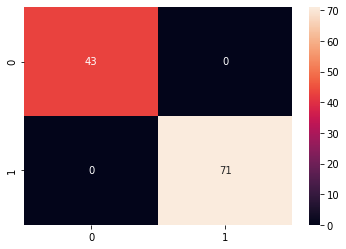

In [111]:
df = X
#df['Unnamed: 32'] = 0
pso_calculate(nf,df)